##### 1.4.12 Template Matching 132

In [56]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import pyplot as plt

In [57]:
img = cv2.imread('hmson1.avi_000079750.png',0)
img2 = img.copy()
template = cv2.imread('20201105_125557.png',0)

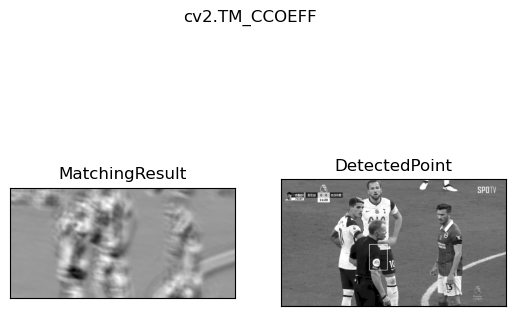

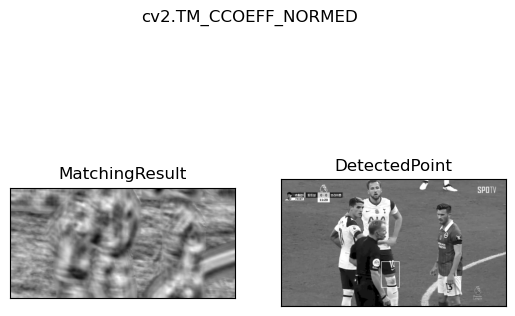

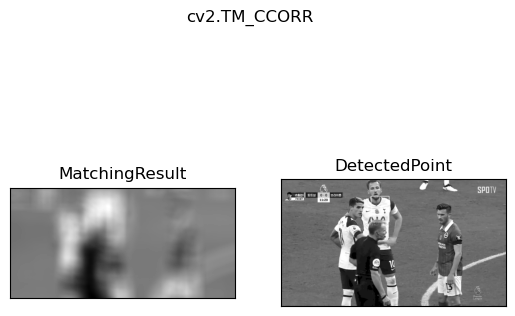

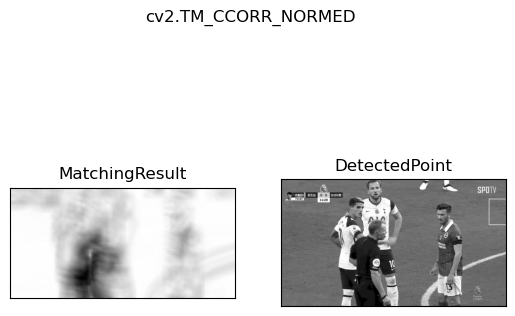

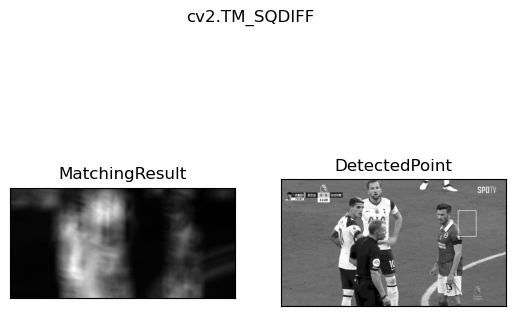

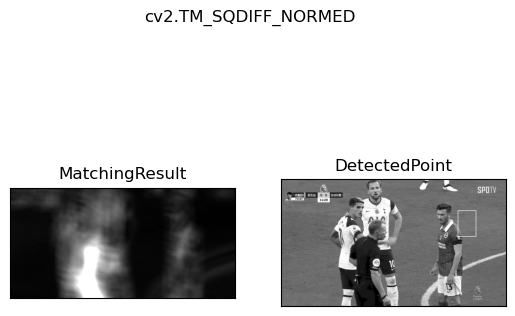

In [58]:
w,h=template.shape[::-1]
 
#Allthe6methodsforcomparisoninalist
methods=['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR',
 'cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img= img2.copy()
    method=eval(meth)
 
    #Apply templateMatching
    res= cv2.matchTemplate(img,template,method)
    min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(res)
 
    #IfthemethodisTM_SQDIFFor TM_SQDIFF_NORMED,takeminimum
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left=min_loc
    else:
        top_left=max_loc
    bottom_right=(top_left[0]+ w,top_left[1]+h)
    cv2.rectangle(img,top_left,bottom_right,255,2)
    
    plt.subplot(121),plt.imshow(res,cmap='gray')
    plt.title('MatchingResult'), plt.xticks([]),plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap='gray')
    plt.title('DetectedPoint'),plt.xticks([]),plt.yticks([])
    plt.suptitle(meth)

    plt.show()

 Template Matching with Multiple Objects

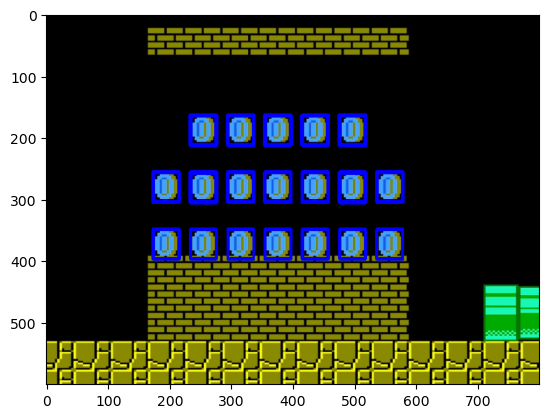

In [65]:
img_rgb = cv2.imread('mario.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = img_gray[164:212, 234:276]   # 마리오 사진의 코인 좌표
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8

loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    
cv2.imwrite('res.png',img_rgb)

plt.imshow(img_rgb)

In [66]:
print(loc)

(array([162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 163,
       163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163,
       163, 163, 163, 163, 163, 163, 164, 164, 164, 164, 164, 164, 164,
       164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164,
       164, 164, 164, 164, 165, 165, 165, 165, 165, 165, 165, 165, 165,
       165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 166, 166,
       166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 256, 256, 256, 256, 256, 256,
       256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256,
       256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 257, 257,
       257, 257, 257, 257, 257, 257, 257, 257, 257, 257, 257, 257, 257,
       257, 257, 257, 257, 257, 257, 257, 257, 257, 257, 257, 2